<a href="https://colab.research.google.com/github/1234Ranjitha/1234Ranjitha/blob/main/1st_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install spotipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 3.0 MB/s eta 0:00:00


In [2]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=c315d24e5e04b98144c5548435efb69195cd67848c15c48e93dae237d1c51dd0
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Set your Spotify API credentials
client_id = 'fe8c580965194d3d8a3697698fa53099'
client_secret = '9c58e0984ac048268df6c9c44b8bbfb3'

# Authenticate with Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Define different types of songs you want to search for
queries = ["Rock", "Pop", "Jazz", "Hip Hop", "Classical"]

# Initialize a list to store dictionaries of song information
song_info_list = []

# Set the minimum number of tracks for each genre
min_tracks_per_genre = 2000

# Iterate over each query and collect song information until the minimum number of tracks is reached
for query in queries:
    num_tracks = 0
    offset = 0
    while num_tracks < min_tracks_per_genre:
        results = sp.search(q=query, type='track', limit=50, offset=offset)  # Limiting to 50 tracks per query
        if not results['tracks']['items']:
            break  # No more tracks available for this query
        for track in results['tracks']['items']:
            song_id = track['id']
            song_info = sp.track(song_id)
            song_info_list.append({
                'Type': query,
                'Song Name': track['name'],
                'Artist Name': track['artists'][0]['name'],
                'Release Year': song_info['album']['release_date'][:4],  # Extracting the year from release_date
                'Song ID': song_id
            })
            num_tracks += 1
            if num_tracks >= min_tracks_per_genre:
                break
        offset += 50  # Increment the offset by the limit for the next page of results

# Create a DataFrame from the list of song information
song_df = pd.DataFrame(song_info_list)

# Print the DataFrame
print(song_df)


KeyboardInterrupt: 

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from langdetect import detect

# Set your Spotify API credentials
client_id = 'fe8c580965194d3d8a3697698fa53099'
client_secret = '9c58e0984ac048268df6c9c44b8bbfb3'

# Authenticate with Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Define different types of songs you want to search for
queries = ["Rock", "Pop", "Jazz", "Hip Hop", "Classical"]

# Initialize a list to store dictionaries of song information
song_info_list = []

# Set the minimum number of tracks for each genre
min_tracks_per_genre = 200

# Iterate over each query and collect song information until the minimum number of tracks is reached
for query in queries:
    num_tracks = 0
    offset = 0
    while num_tracks < min_tracks_per_genre:
        results = sp.search(q=query, type='track', limit=50, offset=offset)  # Limiting to 50 tracks per query
        for track in results['tracks']['items']:
            song_id = track['id']
            song_info = sp.track(song_id)
            # Detect language of song name
            song_name = track['name']
            language = detect(song_name)
            song_info_list.append({
                'Type': query,
                'Song Name': song_name,
                'Artist Name': track['artists'][0]['name'],
                'Release Year': song_info['album']['release_date'][:4],  # Extracting the year from release_date
                'Language': language,
                'Song ID': song_id
            })
            num_tracks += 1
            if num_tracks >= min_tracks_per_genre:
                break
        offset += 50  # Increment the offset for the next page of results

# Create a DataFrame from the list of song information
song_df = pd.DataFrame(song_info_list)

# Print the DataFrame
print(song_df)


KeyboardInterrupt: 

In [11]:
song_df=pd.read_csv("/content/songdf3.csv")
song_df

,User ID,User ID Link,Song Name,Artist Name,Release Year,Song ID,Duration (ms),Album Name,Language,Rating,Likes
0,d9953e45e79db0b2ec05ebc00dc3776a,https://open.spotify.com/user/d9953e45e79db0b2...,Varaha Roopam Daiva Va Rishtam,B. Ajaneesh Loknath,2022,4jeNzToNz1lWTy1SLPQf9K,276416,Kantara (Original Motion Picture Soundtrack),Kannada,4.538965,957
1,3a1934c276bf9fe453e9c3558b1a29fd,https://open.spotify.com/user/3a1934c276bf9fe4...,Bade Miyan Chote Miyan (Title Track - Kannada)...,Vishal Mishra,2024,3wKYTh0vVj79m8nfFohotg,159093,Bade Miyan Chote Miyan (Title Track - Kannada)...,Kannada,0.037699,861
2,c82e76f8732838887ad402e302907b73,https://open.spotify.com/user/c82e76f873283888...,"Ninnidale - From ""Milana""",Sonu Nigam,2016,5bEJ8asxewV86ZCtpdYV5r,289358,Sonu Nigam - Melodies - Kannada Hits - 2016,Kannada,0.273828,943
3,fe2e1abf0eb8ef84c9ab89079cdad5d6,https://open.spotify.com/user/fe2e1abf0eb8ef84...,Kannada,Rudresh Mahanthappa,2004,1VHLynCq7AGhWUteU6isyI,408373,Mother Tongue,Kannada,3.689248,88
4,3ba61e39fb9e1b063aa299c102ef76a3,https://open.spotify.com/user/3ba61e39fb9e1b06...,"Raghunandana (From ""HanuMan"") [Kannada]",GowraHari,2024,3a2FYIaDphMc8XeMIcNfSz,151250,"Raghunandana (From ""HanuMan"") [Kannada]",Kannada,3.816168,197
...,...,...,...,...,...,...,...,...,...,...,...
5495,aba06f34cd452f372961209951f3c2c4,https://open.spotify.com/user/aba06f34cd452f37...,Moves In Silence,Rajesh Nepali,2023,2chZmYapWgOwrZBzfwALrP,186456,Echo House,Nepali,4.525749,170
5496,8c7f4ac13855bc5568ed61ed78766203,https://open.spotify.com/user/8c7f4ac13855bc55...,Bihani (Morning),Binod Katuwal,2013,6ZV6iZgIs0ymezI5DKknmO,1123013,Nepalese Flute Meditations,Nepali,4.625486,620
5497,6444986adb7156df84154c1aa6a8c616,https://open.spotify.com/user/6444986adb7156df...,Rajamati,Bharat Nepali,2002,1Y78X9PiUjRirCCTIZ2nHE,300546,Buddham Sharanam Gacchami - Typical Newari Mus...,Nepali,0.791966,563
5498,f0018674bc49fbb0af7d18675fa5aa27,https://open.spotify.com/user/f0018674bc49fbb0...,Jhar,Kta Haru,2023,6kYLBQiJMkIhi6wJSfwGka,262031,Jhar,Nepali,1.536556,87


In [12]:
print(song_df.head())
print(song_df.shape)
print(song_df.info())
print(song_df.describe())

                            User ID  \
0  d9953e45e79db0b2ec05ebc00dc3776a   
1  3a1934c276bf9fe453e9c3558b1a29fd   
2  c82e76f8732838887ad402e302907b73   
3  fe2e1abf0eb8ef84c9ab89079cdad5d6   
4  3ba61e39fb9e1b063aa299c102ef76a3   

                                        User ID Link  \
0  https://open.spotify.com/user/d9953e45e79db0b2...   
1  https://open.spotify.com/user/3a1934c276bf9fe4...   
2  https://open.spotify.com/user/c82e76f873283888...   
3  https://open.spotify.com/user/fe2e1abf0eb8ef84...   
4  https://open.spotify.com/user/3ba61e39fb9e1b06...   

                                           Song Name          Artist Name  \
0                     Varaha Roopam Daiva Va Rishtam  B. Ajaneesh Loknath   
1  Bade Miyan Chote Miyan (Title Track - Kannada)...        Vishal Mishra   
2                          Ninnidale - From "Milana"           Sonu Nigam   
3                                            Kannada  Rudresh Mahanthappa   
4            Raghunandana (From "HanuMan") 

In [6]:
import matplotlib.pyplot as plt

# Example: Plotting a bar chart of song counts by genre
plt.figure(figsize=(10, 6))
song_df['Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()


KeyError: 'Type'

<Figure size 1000x600 with 0 Axes>

In [13]:
# Export DataFrame to CSV file
song_df.to_csv('song_data.csv', index=False)

# Export DataFrame to Excel file
song_df.to_excel('song_data.xlsx', index=False)

# Export DataFrame to JSON file
song_df.to_json('song_data.json', orient='records')


**Handling Missing Values:** Check for missing values and decide on a strategy to handle them.

In [14]:
# Check for missing values
print(song_df.isnull().sum())

# No missing values found, so no action needed in this case


User ID          0
User ID Link     0
Song Name        0
Artist Name      0
Release Year     0
Song ID          0
Duration (ms)    0
Album Name       0
Language         0
Rating           0
Likes            0
dtype: int64


**Data Cleaning:**Check for any inconsistencies or errors in the data and clean them if necessary.

In [15]:
# Check for duplicate rows
duplicate_rows = song_df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Remove duplicate rows if any
song_df = song_df[~duplicate_rows]


Number of duplicate rows: 0


**Feature Engineering:**Extract useful features from existing data or create new features if necessary.

In [16]:
# Convert 'Release Year' column to numeric
song_df['Release Year'] = pd.to_numeric(song_df['Release Year'], errors='coerce')


**Encoding Categorical Variables:**Convert categorical variables into numerical representations if needed.

In [17]:
# One-hot encode the 'Type' column
song_df = pd.get_dummies(song_df, columns=['Type'], prefix='Genre')


KeyError: "None of [Index(['Type'], dtype='object')] are in the [columns]"

**Feature Scaling/Normalization:** Scale numerical features if necessary to bring them to a similar scale.

In [18]:
# Example: Scale 'Release Year' column using Min-Max scaling
song_df['Release Year'] = (song_df['Release Year'] - song_df['Release Year'].min()) / (song_df['Release Year'].max() - song_df['Release Year'].min())


**splitting Data:** Split the dataset into training and testing sets if you're planning to build predictive models.

In [19]:
from sklearn.model_selection import train_test_split

# Example: Split data into features and target variable
X = song_df.drop(['Song Name', 'Artist Name', 'Song ID'], axis=1)  # Features
y = song_df['Song ID']  # Target variable

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


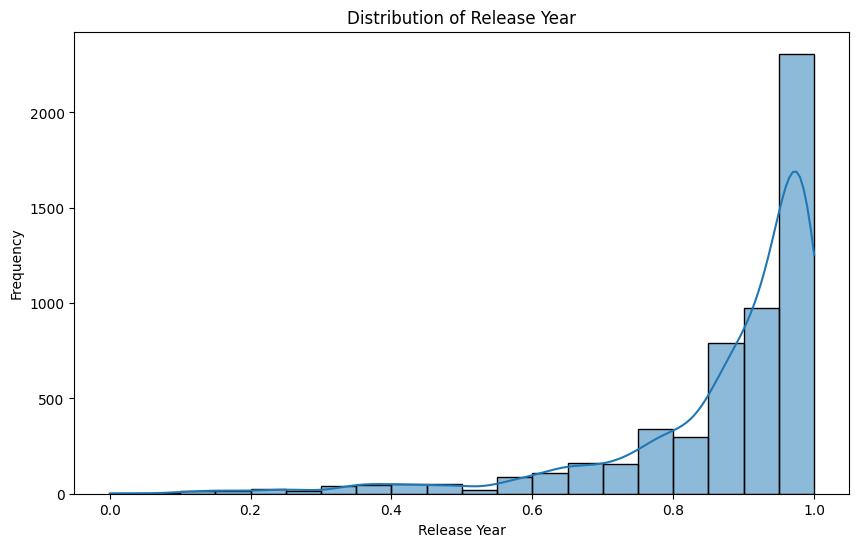

<ipython-input-27-4475dab55228>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(song_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


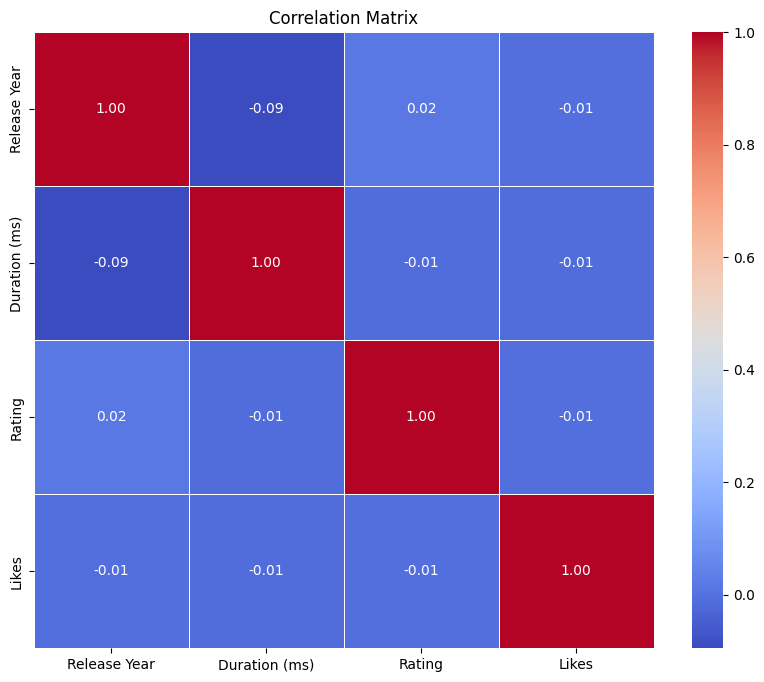

Spanish      411
Malayalam    411
Hindi        409
Bengali      407
English      406
Tamil        400
Nepali       398
Marathi      394
Chinese      392
Telugu       392
Kannada      380
Name: Language, dtype: int64
Kannada      120
Telugu       108
Chinese      108
Marathi      106
Nepali       102
Tamil        100
English       94
Bengali       93
Hindi         91
Malayalam     89
Spanish       89
Name: Language, dtype: int64
Column 'User ID' has non-numerical values.
Column 'User ID Link' has non-numerical values.
Column 'Song ID' has non-numerical values.
Column 'Album Name' has non-numerical values.
Column 'Language' has non-numerical values.


AttributeError: 'Series' object has no attribute 'columns'

In [27]:
# 1. Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of 'Release Year' feature
plt.figure(figsize=(10, 6))
sns.histplot(data=song_df, x='Release Year', bins=20, kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(song_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 2. Feature Selection/Engineering (if needed)
# Example: Select top features using feature importance ranking or other techniques

# 3. Model Building
# Choose and train a machine learning model (e.g., RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Import SimpleImputer from sklearn
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object
imputer = SimpleImputer(strategy="most_frequent")

# Fit the imputer on the Language column
imputer.fit(X_train[["Language"]])
print(X_train["Language"].value_counts())
print(X_test["Language"].value_counts())
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(f"Column '{col}' has non-numerical values.")

for col in y_train.columns:
    if y_train[col].dtype == 'object':
        print(f"Column '{col}' has non-numerical values.")

# Transform the Language column in both X_train and X_test
X_train["Language"] = imputer.transform(X_train[["Language"]])
X_test["Language"] = imputer.transform(X_test[["Language"]])


# Train the model
model.fit(X_train, y_train)

# 4. Model Evaluation
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 5. Interpretation
# Example: Visualize feature importance
feature_importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 6. Visualization (continued)
# Example: Visualize prediction distributions
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, color='skyblue', label='Predictions')
sns.histplot(y_test, color='orange', label='Actual', alpha=0.5)
plt.title('Prediction Distributions')
plt.xlabel('Song ID')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 7. Deployment: (if applicable)
# Deploy the trained model using appropriate tools/frameworks

# 8. Documentation and Reporting: (if applicable)
# Prepare a report or presentation summarizing the analysis process and results

# 9. Further Analysis: (if needed)
# Identify areas for further investigation or refinement based on initial results


In [21]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

# Set up Spotify API authentication
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id='fe8c580965194d3d8a3697698fa53099',
                                               client_secret='9c58e0984ac048268df6c9c44b8bbfb3',
                                               redirect_uri="http://localhost:3036"))

# Get user's saved tracks (listening history)
results = sp.current_user_saved_tracks()
tracks = results['items']

# Initialize lists to store user IDs, song IDs, and ratings
user_ids = []
song_ids = []
ratings = []

# Process the tracks data
for track in tracks:
    user_ids.append(track['added_by']['id'])  # Assuming 'added_by' contains user information
    song_ids.append(track['track']['id'])
    ratings.append(1)  # Simulate implicit rating (e.g., user saved the track)

# Create a DataFrame from the collected data
data = {'user_id': user_ids, 'song_id': song_ids, 'rating': ratings}
df = pd.DataFrame(data)

# Display the DataFrame]
print(df)


KeyboardInterrupt: 

**another code**

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
spotify_data = pd.read_csv('/content/spotify_data.csv')
spotify_data

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4.0,-10.058,1.0,0.0429,0.69400,0.000000,0.1150,0.139,133.406,240166.0,3.0
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3.0,-10.286,1.0,0.0258,0.47700,0.000014,0.0974,0.515,140.182,216387.0,4.0
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3.0,-13.711,1.0,0.0323,0.33800,0.000050,0.0895,0.145,139.832,158960.0,4.0
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10.0,-9.845,1.0,0.0363,0.80700,0.000000,0.0797,0.508,204.961,304293.0,4.0
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6.0,-5.419,0.0,0.0302,0.07260,0.019300,0.1100,0.217,171.864,244320.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724000,814207,Rilo Kiley,Three Hopeful Thoughts,6YhvZg7FpgU46TIeduFceB,22,2002,folk,0.432,0.684,11.0,-6.714,1.0,0.0276,0.00192,0.007530,0.1240,0.600,96.487,170040.0,4.0
724001,814208,Elizabeth Mitchell,Hey Bo Diddley,61g8xbtg4WjIQFafIjuCJ1,23,2002,folk,0.861,0.693,0.0,-14.205,1.0,0.0890,0.55800,0.544000,0.3120,0.903,104.450,175227.0,4.0
724002,814209,Leonard Cohen,Suzanne,3I5rm3XcJOGLOwtPw1s75k,31,2002,folk,0.403,0.140,6.0,-16.252,0.0,0.0367,0.90500,0.000353,0.0960,0.316,133.161,227267.0,4.0
724003,814210,Arthur Russell,"""Instrumentals"" Volume 1 - Part 1",6hfEzmNLFq74Id66GracYO,27,2002,folk,0.592,0.832,5.0,-12.563,0.0,0.0350,0.11600,0.000736,0.1310,0.785,113.029,319787.0,4.0


In [3]:
# Data Cleaning
# Remove duplicate entries
spotify_data = spotify_data.drop_duplicates()

In [4]:
# Handle missing values (replace with median)
spotify_data.fillna(spotify_data.median(), inplace=True)

<ipython-input-4-70104fe1e807>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  spotify_data.fillna(spotify_data.median(), inplace=True)


In [5]:
# Feature Engineering
# Extract year from release_date
spotify_data['year'] = pd.to_datetime(spotify_data['year']).dt.year

In [6]:
# Encode categorical variables (mode, explicit)
spotify_data['mode'] = spotify_data['mode'].map({0: 'Minor', 1: 'Major'})
spotify_data = pd.get_dummies(spotify_data, columns=['mode'])

In [7]:
#Normalization
# Select numerical features to be normalized
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'year']


In [8]:
# Min-Max Scaling
scaler = MinMaxScaler()
spotify_data[numerical_features] = scaler.fit_transform(spotify_data[numerical_features])


In [9]:
# Print first few rows of preprocessed dataset
print(spotify_data)

        Unnamed: 0         artist_name                         track_name  \
0                0          Jason Mraz                    I Won't Give Up   
1                1          Jason Mraz                   93 Million Miles   
2                2       Joshua Hyslop                   Do Not Let Me Go   
3                3        Boyce Avenue                           Fast Car   
4                4        Andrew Belle                   Sky's Still Blue   
...            ...                 ...                                ...   
724000      814207          Rilo Kiley             Three Hopeful Thoughts   
724001      814208  Elizabeth Mitchell                     Hey Bo Diddley   
724002      814209       Leonard Cohen                            Suzanne   
724003      814210      Arthur Russell  "Instrumentals" Volume 1 - Part 1   
724004      814211  The Red Army Choir                          Dark Eyes   

                      track_id  popularity  year     genre  danceability  \

In [10]:
# Print first few rows of preprocessed dataset
print(spotify_data.head())

   Unnamed: 0    artist_name        track_name                track_id  \
0           0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6   
1           1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218   
2           2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F   
3           3   Boyce Avenue          Fast Car  63wsZUhUZLlh1OsyrZq7sz   
4           4   Andrew Belle  Sky's Still Blue  6nXIYClvJAfi6ujLiKqEq8   

   popularity  year     genre  danceability  energy   key  ...  speechiness  \
0          68   0.0  acoustic      0.487386   0.303   4.0  ...     0.044181   
1          50   0.0  acoustic      0.577195   0.454   3.0  ...     0.026571   
2          57   0.0  acoustic      0.412714   0.234   3.0  ...     0.033265   
3          58   0.0  acoustic      0.395560   0.251  10.0  ...     0.037384   
4          54   0.0  acoustic      0.433905   0.791   6.0  ...     0.031102   

   acousticness  instrumentalness  liveness  valence     tempo  duration_ms  \
0

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Define TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create TF-IDF matrix for track metadata
tfidf_matrix = tfidf_vectorizer.fit_transform(spotify_data[['artist_name', 'track_name']])

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get top N similar tracks for a given track
def get_similar_tracks(track_index, cosine_sim=cosine_sim, N=10):
    sim_scores = list(enumerate(cosine_sim[track_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:N+1]
    track_indices = [i[0] for i in sim_scores]
    return spotify_data.iloc[track_indices]

# Example: Get top 5 similar tracks for a given track index
similar_tracks = get_similar_tracks(0)
print(similar_tracks)


   Unnamed: 0 artist_name        track_name                track_id  \
1           1  Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218   

   popularity  year     genre  danceability  energy  key  ...  speechiness  \
1          50   0.0  acoustic      0.577195   0.454  3.0  ...     0.026571   

   acousticness  instrumentalness  liveness  valence     tempo  duration_ms  \
1      0.478916          0.000014    0.0974    0.515  0.561195     216387.0   

   time_signature  mode_Major  mode_Minor  
1             4.0           1           0  

[1 rows x 21 columns]


In [ ]:
item_features = spotify_data[['popularity', 'year', 'danceability', 'energy', 'key']]  # Adjust feature names accordingly
item_similarity = cosine_similarity(item_features)


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
kannada_df = pd.read_csv('/content/songdf3.csv')
kannada_df

,User ID,User ID Link,Song Name,Artist Name,Release Year,Song ID,Duration (ms),Album Name,Language,Rating,Likes
0,d9953e45e79db0b2ec05ebc00dc3776a,https://open.spotify.com/user/d9953e45e79db0b2...,Varaha Roopam Daiva Va Rishtam,B. Ajaneesh Loknath,2022,4jeNzToNz1lWTy1SLPQf9K,276416,Kantara (Original Motion Picture Soundtrack),Kannada,4.538965,957
1,3a1934c276bf9fe453e9c3558b1a29fd,https://open.spotify.com/user/3a1934c276bf9fe4...,Bade Miyan Chote Miyan (Title Track - Kannada)...,Vishal Mishra,2024,3wKYTh0vVj79m8nfFohotg,159093,Bade Miyan Chote Miyan (Title Track - Kannada)...,Kannada,0.037699,861
2,c82e76f8732838887ad402e302907b73,https://open.spotify.com/user/c82e76f873283888...,"Ninnidale - From ""Milana""",Sonu Nigam,2016,5bEJ8asxewV86ZCtpdYV5r,289358,Sonu Nigam - Melodies - Kannada Hits - 2016,Kannada,0.273828,943
3,fe2e1abf0eb8ef84c9ab89079cdad5d6,https://open.spotify.com/user/fe2e1abf0eb8ef84...,Kannada,Rudresh Mahanthappa,2004,1VHLynCq7AGhWUteU6isyI,408373,Mother Tongue,Kannada,3.689248,88
4,3ba61e39fb9e1b063aa299c102ef76a3,https://open.spotify.com/user/3ba61e39fb9e1b06...,"Raghunandana (From ""HanuMan"") [Kannada]",GowraHari,2024,3a2FYIaDphMc8XeMIcNfSz,151250,"Raghunandana (From ""HanuMan"") [Kannada]",Kannada,3.816168,197
...,...,...,...,...,...,...,...,...,...,...,...
5495,aba06f34cd452f372961209951f3c2c4,https://open.spotify.com/user/aba06f34cd452f37...,Moves In Silence,Rajesh Nepali,2023,2chZmYapWgOwrZBzfwALrP,186456,Echo House,Nepali,4.525749,170
5496,8c7f4ac13855bc5568ed61ed78766203,https://open.spotify.com/user/8c7f4ac13855bc55...,Bihani (Morning),Binod Katuwal,2013,6ZV6iZgIs0ymezI5DKknmO,1123013,Nepalese Flute Meditations,Nepali,4.625486,620
5497,6444986adb7156df84154c1aa6a8c616,https://open.spotify.com/user/6444986adb7156df...,Rajamati,Bharat Nepali,2002,1Y78X9PiUjRirCCTIZ2nHE,300546,Buddham Sharanam Gacchami - Typical Newari Mus...,Nepali,0.791966,563
5498,f0018674bc49fbb0af7d18675fa5aa27,https://open.spotify.com/user/f0018674bc49fbb0...,Jhar,Kta Haru,2023,6kYLBQiJMkIhi6wJSfwGka,262031,Jhar,Nepali,1.536556,87


In [4]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Define TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create TF-IDF matrix for track metadata
tfidf_matrix = tfidf_vectorizer.fit_transform(kannada_df[['Artist Name', 'Song Name', 'Album Name']])

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get top N similar tracks for a given track
def get_similar_tracks(track_index, cosine_sim=cosine_sim, N=5):
    sim_scores = list(enumerate(cosine_sim[track_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:N+1]
    track_indices = [i[0] for i in sim_scores]
    return kannada_df.iloc[track_indices]

# Example: Get top 5 similar tracks for a given track index
similar_tracks = get_similar_tracks(1)
print(similar_tracks)


                            User ID  \
0  d9953e45e79db0b2ec05ebc00dc3776a   
2  c82e76f8732838887ad402e302907b73   

                                        User ID Link  \
0  https://open.spotify.com/user/d9953e45e79db0b2...   
2  https://open.spotify.com/user/c82e76f873283888...   

                        Song Name          Artist Name  Release Year  \
0  Varaha Roopam Daiva Va Rishtam  B. Ajaneesh Loknath          2022   
2       Ninnidale - From "Milana"           Sonu Nigam          2016   

                  Song ID  Duration (ms)  \
0  4jeNzToNz1lWTy1SLPQf9K         276416   
2  5bEJ8asxewV86ZCtpdYV5r         289358   

                                     Album Name Language    Rating  Likes  
0  Kantara (Original Motion Picture Soundtrack)  Kannada  4.538965    957  
2   Sonu Nigam - Melodies - Kannada Hits - 2016  Kannada  0.273828    943  


In [12]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the average TF-IDF vector for all tracks
#average_tfidf_vector = np.mean(tfidf_matrix, axis=0)
average_tfidf_vector = np.asarray(average_tfidf_vector)

# Calculate cosine similarity between the average vector and all track vectors
new_user_similarities = cosine_similarity(tfidf_matrix, average_tfidf_vector)

# Get indices of top 10 similar tracks
top_indices = np.argsort(new_user_similarities, axis=0)[-10:][::-1]

# Get top 10 similar tracks
recommended_tracks = kannada_df.iloc[top_indices.flatten()]

print(recommended_tracks)

                            User ID  \
2  c82e76f8732838887ad402e302907b73   
1  3a1934c276bf9fe453e9c3558b1a29fd   
0  d9953e45e79db0b2ec05ebc00dc3776a   

                                        User ID Link  \
2  https://open.spotify.com/user/c82e76f873283888...   
1  https://open.spotify.com/user/3a1934c276bf9fe4...   
0  https://open.spotify.com/user/d9953e45e79db0b2...   

                                           Song Name          Artist Name  \
2                          Ninnidale - From "Milana"           Sonu Nigam   
1  Bade Miyan Chote Miyan (Title Track - Kannada)...        Vishal Mishra   
0                     Varaha Roopam Daiva Va Rishtam  B. Ajaneesh Loknath   

   Release Year                 Song ID  Duration (ms)  \
2          2016  5bEJ8asxewV86ZCtpdYV5r         289358   
1          2024  3wKYTh0vVj79m8nfFohotg         159093   
0          2022  4jeNzToNz1lWTy1SLPQf9K         276416   

                                          Album Name Language    Rating  Lik